Bank Customer Segmentation (1M+ Transactions)
https://www.kaggle.com/shivamb/bank-customer-segmentation

In [ ]:
!pip3 install -I pandas_profiling -q
!pip3 install pycaret -q
!pip3 install shap -q
!pip install pyyaml==5.4.1

     |████████████████████████████████| 261 kB 11.1 MB/s 
     |████████████████████████████████| 15.7 MB 44.8 MB/s 
     |████████████████████████████████| 11.3 MB 53.1 MB/s 
     |████████████████████████████████| 62 kB 543 kB/s 
     |████████████████████████████████| 596 kB 37.8 MB/s 
     |████████████████████████████████| 292 kB 28.2 MB/s 
     |████████████████████████████████| 11.2 MB 35.6 MB/s 
     |████████████████████████████████| 102 kB 9.3 MB/s 
     |████████████████████████████████| 303 kB 42.3 MB/s 
     |████████████████████████████████| 3.1 MB 10.6 MB/s 
     |████████████████████████████████| 133 kB 4.5 MB/s 
     |████████████████████████████████| 10.1 MB 10.1 MB/s 
     |████████████████████████████████| 675 kB 9.0 MB/s 
     |████████████████████████████████| 38.1 MB 2.5 MB/s 
     |████████████████████████████████| 76 kB 1.6 MB/s 
     |████████████████████████████████| 1.9 MB 38.1 MB/s 
     |████████████████████████████████| 53 kB 1.6 MB/s 
     |█████████████

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.listdir('/content/drive')

['.file-revisions-by-id', '.shortcut-targets-by-id', 'MyDrive', '.Trash-0']

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/bank_transactions.csv'

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

df = pd.read_csv(file_path)

In [ ]:
df

TransactionID CustomerID  ... TransactionTime TransactionAmount (INR)
0                  T1   C5841053  ...          143207                    25.0
1                  T2   C2142763  ...          141858                 27999.0
2                  T3   C4417068  ...          142712                   459.0
3                  T4   C5342380  ...          142714                  2060.0
4                  T5   C9031234  ...          181156                  1762.5
...               ...        ...  ...             ...                     ...
1048562      T1048563   C8020229  ...          184824                   799.0
1048563      T1048564   C6459278  ...          183734                   460.0
1048564      T1048565   C6412354  ...          183313                   770.0
1048565      T1048566   C6420483  ...          184706                  1000.0
1048566      T1048567   C8337524  ...          181222                  1166.0

[1048567 rows x 9 columns]

In [ ]:
from pandas_profiling import ProfileReport

report = df.profile_report(explorative=True)

In [ ]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#conclusion
#duplicated customers in the list, they make multiple transactions
#customer DOB not so important
#customer gender not important
#transaction date also important, recency and frequency
#transaction amount is important, revenue to company

In [ ]:
df.describe()

CustAccountBalance  TransactionTime  TransactionAmount (INR)
count        1.046198e+06     1.048567e+06             1.048567e+06
mean         1.154035e+05     1.570875e+05             1.574335e+03
std          8.464854e+05     5.126185e+04             6.574743e+03
min          0.000000e+00     0.000000e+00             0.000000e+00
25%          4.721760e+03     1.240300e+05             1.610000e+02
50%          1.679218e+04     1.642260e+05             4.590300e+02
75%          5.765736e+04     2.000100e+05             1.200000e+03
max          1.150355e+08     2.359590e+05             1.560035e+06

In [ ]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [ ]:
df.dropna(inplace=True)

In [ ]:
df_duplicates = df[df.duplicated(subset ='CustomerID')]
df_duplicates

TransactionID CustomerID  ... TransactionTime TransactionAmount (INR)
1564            T1565   C1841937  ...          212815                  150.00
2099            T2100   C2177553  ...          201640                  200.00
3445            T3446   C8625213  ...          163953                  136.00
3597            T3598   C1729685  ...          164451                   50.73
3692            T3693   C5930770  ...          170717                  248.00
...               ...        ...  ...             ...                     ...
1048549      T1048550   C4819452  ...          184226                 1094.00
1048555      T1048556   C2122724  ...          185337                 5259.00
1048556      T1048557   C3414578  ...          184932                 2000.00
1048564      T1048565   C6412354  ...          183313                  770.00
1048566      T1048567   C8337524  ...          181222                 1166.00

[162256 rows x 9 columns]

In [ ]:
#take one example of one customer to eyeball the data
df_eg = df[df['CustomerID'] == 'C8337524']
df_eg

TransactionID CustomerID  ... TransactionTime TransactionAmount (INR)
884589        T884590   C8337524  ...          223947                   310.0
1048566      T1048567   C8337524  ...          181222                  1166.0

[2 rows x 9 columns]

In [ ]:
#check why transaction is zero
# maybe due to free gifts
# but entries with zero will be removed because they do not give info as to how to improve revenue
df_eg2 = df[df['TransactionAmount (INR)'] == 0]
df_eg2

TransactionID CustomerID  ... TransactionTime TransactionAmount (INR)
384              T385   C6117158  ...           74817                     0.0
2498            T2499   C9074213  ...          154219                     0.0
2623            T2624   C7930692  ...          152742                     0.0
2672            T2673   C4397046  ...           30017                     0.0
4083            T4084   C4227711  ...           70059                     0.0
...               ...        ...  ...             ...                     ...
1029145      T1029146   C5524842  ...           33929                     0.0
1032164      T1032165   C9026149  ...          110728                     0.0
1036358      T1036359   C5936956  ...          115328                     0.0
1038286      T1038287   C7633429  ...           53145                     0.0
1038415      T1038416   C3924885  ...           71820                     0.0

[820 rows x 9 columns]

In [ ]:
#calculate recency, frequency
df['recency'] = max(df.TransactionDate) - df.TransactionDate
df.sort_values('recency', ascending=True)

TransactionID CustomerID  ... TransactionAmount (INR)  recency
914816       T914817   C3631812  ...                    59.0   0 days
903664       T903665   C7713754  ...                  1800.0   0 days
903663       T903664   C4912433  ...                   212.3   0 days
903662       T903663   C7026020  ...                   230.0   0 days
903661       T903662   C5021422  ...                    23.0   0 days
...              ...        ...  ...                     ...      ...
99811         T99812   C4815186  ...                   110.0 336 days
99812         T99813   C4123275  ...                   380.0 336 days
99813         T99814   C3413838  ...                  5000.0 336 days
99806         T99807   C3317871  ...                   160.0 336 days
107366       T107367   C6213345  ...                   100.0 336 days

[1041614 rows x 10 columns]

In [ ]:
rfm_r = df.groupby('CustomerID')['recency'].min()
rfm_r = rfm_r.reset_index().set_index('CustomerID')
rfm_r['recency'] = rfm_r.recency.dt.days
rfm_r

recency
CustomerID         
C1010011         74
C1010012        117
C1010014        154
C1010018         85
C1010024        113
...             ...
C9099836        154
C9099877         85
C9099919        113
C9099941        103
C9099956         75

[879358 rows x 1 columns]

In [ ]:
rfm_f = df.groupby('CustomerID')['TransactionID'].count()
rfm_f = rfm_f.reset_index().set_index('CustomerID')
rfm_f.rename({'TransactionID': 'frequency'}, axis=1, inplace=True)
rfm_f

frequency
CustomerID           
C1010011            2
C1010012            1
C1010014            2
C1010018            1
C1010024            1
...               ...
C9099836            1
C9099877            1
C9099919            1
C9099941            1
C9099956            1

[879358 rows x 1 columns]

In [ ]:
rfm_m = df.groupby('CustomerID')['TransactionAmount (INR)'].sum()
rfm_m = rfm_m.reset_index().set_index('CustomerID')
rfm_m.rename({'TransactionAmount (INR)': 'monetary'}, axis=1, inplace=True)
rfm_m

monetary
CustomerID          
C1010011      5106.0
C1010012      1499.0
C1010014      1455.0
C1010018        30.0
C1010024      5000.0
...              ...
C9099836       691.0
C9099877       222.0
C9099919       126.0
C9099941        50.0
C9099956       855.0

[879358 rows x 1 columns]

In [ ]:
#must be greater than zero, free gifts not important in analysis
rfm_m = rfm_m[rfm_m.monetary > 0]

In [ ]:
rfm = pd.concat([rfm_r, rfm_f, rfm_m], axis=1, join='inner')
rfm

recency  frequency  monetary
CustomerID                              
C1010011         74          2    5106.0
C1010012        117          1    1499.0
C1010014        154          2    1455.0
C1010018         85          1      30.0
C1010024        113          1    5000.0
...             ...        ...       ...
C9099836        154          1     691.0
C9099877         85          1     222.0
C9099919        113          1     126.0
C9099941        103          1      50.0
C9099956         75          1     855.0

[878763 rows x 3 columns]

In [ ]:
rfm.describe()

recency      frequency      monetary
count  878763.000000  878763.000000  8.787630e+05
mean      128.784511       1.184641  1.856323e+03
std        80.045405       0.449081  7.190586e+03
min         0.000000       1.000000  1.000000e-02
25%        86.000000       1.000000  2.000000e+02
50%       109.000000       1.000000  5.340000e+02
75%       153.000000       1.000000  1.500000e+03
max       336.000000       6.000000  1.560035e+06

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.



<AxesSubplot:xlabel='monetary'>

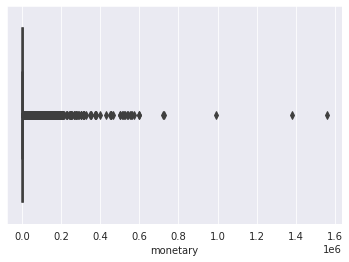

In [ ]:
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
sns.boxplot('monetary', orient='v', data=rfm)

In [ ]:
p1 = rfm.monetary.quantile(0.01)
p99 = rfm.monetary.quantile(0.99)

# Check the descriptive statistics
rfm[(rfm.monetary >= p1) & (rfm.monetary <= p99)].describe()

recency      frequency       monetary
count  862274.000000  862274.000000  862274.000000
mean      128.771785       1.184288    1383.707030
std        80.040112       0.448053    2454.520838
min         0.000000       1.000000      10.000000
25%        86.000000       1.000000     200.000000
50%       109.000000       1.000000     532.000000
75%       153.000000       1.000000    1494.987500
max       336.000000       6.000000   23176.500000

In [ ]:
rfm.sort_values('monetary', ascending=False).head(10)

recency  frequency    monetary
CustomerID                                
C7319271        113          1  1560034.99
C6677159        109          1  1380002.88
C4141768        108          1   991132.22
C8217728        244          2   724472.00
C1830891        276          1   720001.16
C6549785         91          1   600008.32
C5036642        245          1   600003.45
C4328064        117          1   569500.27
C1425138        215          1   561001.00
C5833636        113          1   557000.73

In [ ]:
rfm

recency  frequency  monetary
CustomerID                              
C1010011         74          2    5106.0
C1010012        117          1    1499.0
C1010014        154          2    1455.0
C1010018         85          1      30.0
C1010024        113          1    5000.0
...             ...        ...       ...
C9099836        154          1     691.0
C9099877         85          1     222.0
C9099919        113          1     126.0
C9099941        103          1      50.0
C9099956         75          1     855.0

[878763 rows x 3 columns]

In [ ]:
#select 50000 due to greater speed of machine learning with lesser dataset
rfm_test = rfm.iloc[:50000,:]
rfm_test

recency  frequency  monetary
CustomerID                              
C1010011         74          2    5106.0
C1010012        117          1    1499.0
C1010014        154          2    1455.0
C1010018         85          1      30.0
C1010024        113          1    5000.0
...             ...        ...       ...
C1434968         31          2     388.0
C1434969        336          1     265.0
C1434972        103          1    3945.0
C1434974        184          1      31.0
C1434977         85          1     500.0

[50000 rows x 3 columns]

In [ ]:
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [ ]:
from pycaret.clustering import *

In [ ]:
model = setup(
    data=rfm_test,
    silent = True
)

Description                 Value
0                               session_id                  1407
1                            Original Data            (50000, 3)
2                           Missing Values                 False
3                         Numeric Features                     2
4                     Categorical Features                     1
5                         Ordinal Features                 False
6                High Cardinality Features                 False
7                  High Cardinality Method                  None
8                         Transformed Data            (50000, 8)
9                                 CPU Jobs                    -1
10                                 Use GPU                 False
11                          Log Experiment                 False
12                         Experiment Name  cluster-default-name
13                                     USI                  c039
14                         Imputation Type                simple
15          Iterative Imputation Iteration                  None
16                         Numeric Imputer                  mean
17      Iterative Imputation Numeric Model                  None
18                     Categorical Imputer                  mode
19  Iterative Imputation Categorical Model                  None
20           Unknown Categoricals Handling        least_frequent
21                               Normalize                 False
22                        Normalize Method                  None
23                          Transformation                 False
24                   Transformation Method                  None
25                                     PCA                 False
26                              PCA Method                  None
27                          PCA Components                  None
28                     Ignore Low Variance                 False
29                     Combine Rare Levels                 False
30                    Rare Level Threshold                  None
31                         Numeric Binning                 False
32                         Remove Outliers                 False
33                      Outliers Threshold                  None
34                Remove Multicollinearity                 False
35             Multicollinearity Threshold                  None
36             Remove Perfect Collinearity                 False
37                              Clustering                 False
38                    Clustering Iteration                  None
39                     Polynomial Features                 False
40                       Polynomial Degree                  None
41                    Trignometry Features                 False
42                    Polynomial Threshold                  None
43                          Group Features                 False
44                       Feature Selection                 False
45                Feature Selection Method               classic
46            Features Selection Threshold                  None
47                     Feature Interaction                 False
48                           Feature Ratio                 False
49                   Interaction Threshold                  None

In [ ]:
models()

Name                                          Reference
ID                                                                                            
kmeans                   K-Means Clustering                     sklearn.cluster._kmeans.KMeans
ap                     Affinity Propagation  sklearn.cluster._affinity_propagation.Affinity...
meanshift             Mean Shift Clustering              sklearn.cluster._mean_shift.MeanShift
sc                      Spectral Clustering       sklearn.cluster._spectral.SpectralClustering
hclust             Agglomerative Clustering  sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan     Density-Based Spatial Clustering                     sklearn.cluster._dbscan.DBSCAN
optics                    OPTICS Clustering                     sklearn.cluster._optics.OPTICS
birch                      Birch Clustering                       sklearn.cluster._birch.Birch
kmodes                   K-Modes Clustering                               kmodes.kmodes.KModes

In [ ]:
results = pd.DataFrame()

In [ ]:
from tqdm import trange

for i in trange(2, 8):
    kmeans = create_model('kmeans',
                          num_clusters=i,
                          init='k-means++',
                          n_init=10,
                          max_iter=300,
                          random_state=42
                          )
    metrics = pull()  # Extract results table into dataframe
    metrics['algo'] = 'kmeans'
    metrics['num_clusters'] = i
    results = results.append(metrics)

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0      0.7887        162891.8928  ...           0             0

[1 rows x 6 columns]

100%|██████████| 6/6 [05:36<00:00, 56.08s/it]


In [ ]:
results

Silhouette  Calinski-Harabasz  ...    algo  num_clusters
0      0.9652         49182.6947  ...  kmeans             2
0      0.9565         54955.6844  ...  kmeans             3
0      0.9246         87751.6276  ...  kmeans             4
0      0.8293        109479.5415  ...  kmeans             5
0      0.8291        125599.9697  ...  kmeans             6
0      0.7887        162891.8928  ...  kmeans             7

[6 rows x 8 columns]

In [ ]:
best_model = create_model(model='kmeans',
             num_clusters=4, # tell it how many centriods you want
             init='k-means++', # how to put the initial centriods 
             # https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
             # put first centriod, find point furthest away and put 2nd centriod 2/3 away
             n_init=10,  # Run this 10 times and choose the one with the lowest SSE (error: sum of squares)
             # because the centriods are assigned randomly, so do it 10 times
             max_iter=300, # Max iteration 300 times
             random_state=42 
            )

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0      0.9246         87751.6276  ...           0             0

[1 rows x 6 columns]

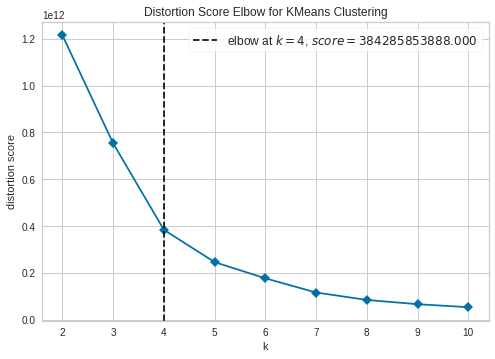

In [ ]:
plot_model(best_model, plot='elbow')

In [ ]:
plot_model(best_model, plot='cluster')

In [ ]:
rfm_df = assign_model(best_model)

In [ ]:
rfm_df

recency  frequency  monetary    Cluster
CustomerID                                         
C1010011         74          2    5106.0  Cluster 0
C1010012        117          1    1499.0  Cluster 0
C1010014        154          2    1455.0  Cluster 0
C1010018         85          1      30.0  Cluster 0
C1010024        113          1    5000.0  Cluster 0
...             ...        ...       ...        ...
C1434968         31          2     388.0  Cluster 0
C1434969        336          1     265.0  Cluster 0
C1434972        103          1    3945.0  Cluster 0
C1434974        184          1      31.0  Cluster 0
C1434977         85          1     500.0  Cluster 0

[50000 rows x 4 columns]

In [ ]:
rfm_df.Cluster.value_counts()

Cluster 0    49087
Cluster 3      819
Cluster 1       92
Cluster 2        2
Name: Cluster, dtype: int64

<AxesSubplot:xlabel='Cluster', ylabel='recency'>

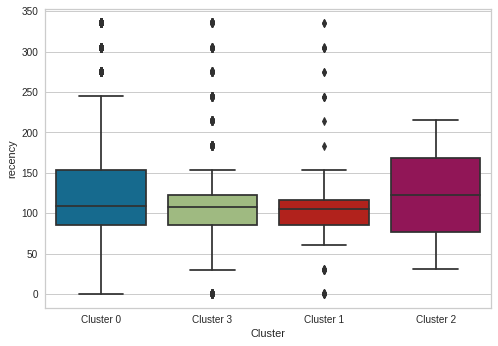

In [ ]:
# Clusters vs Recency
sns.boxplot('Cluster', 'recency', data=rfm_df)

<AxesSubplot:xlabel='Cluster', ylabel='frequency'>

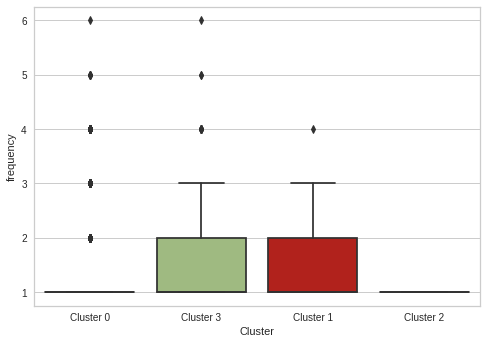

In [ ]:
# Clusters vs Frequency
sns.boxplot('Cluster', 'frequency', data=rfm_df)

<AxesSubplot:xlabel='Cluster', ylabel='monetary'>

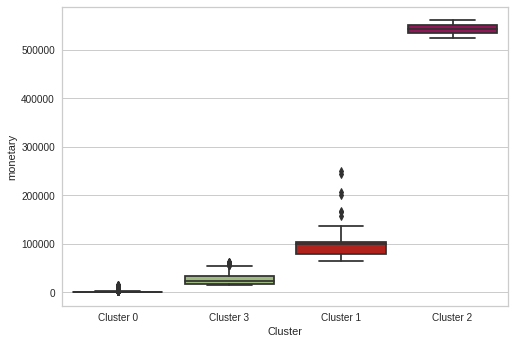

In [ ]:
# Clusters vs Monetary Value
sns.boxplot('Cluster', 'monetary', data=rfm_df)